In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from word2number import w2n
import statsmodels.api as smi
import seaborn as sns
%matplotlib inline

In [8]:
data=pd.read_csv(r"E:\UPX\Machine Learning\Linear Regerssion\csv_files\Summary of Weather.csv")
data.shape

(119040, 31)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
STA            119040 non-null int64
Date           119040 non-null object
Precip         119040 non-null object
WindGustSpd    532 non-null float64
MaxTemp        119040 non-null float64
MinTemp        119040 non-null float64
MeanTemp       119040 non-null float64
Snowfall       117877 non-null object
PoorWeather    34237 non-null object
YR             119040 non-null int64
MO             119040 non-null int64
DA             119040 non-null int64
PRCP           117108 non-null object
DR             533 non-null float64
SPD            532 non-null float64
MAX            118566 non-null float64
MIN            118572 non-null float64
MEA            118542 non-null float64
SNF            117877 non-null object
SND            5563 non-null float64
FT             0 non-null float64
FB             0 non-null float64
FTI            0 non-null float64
ITH            0 non-null float64

In [10]:
data=data[['MinTemp','MaxTemp']]

In [11]:
data

,MinTemp,MaxTemp
0,22.222222,25.555556
1,21.666667,28.888889
2,22.222222,26.111111
3,22.222222,26.666667
4,21.666667,26.666667
...,...,...
119035,18.333333,28.333333
119036,18.333333,29.444444
119037,18.333333,28.333333
119038,18.333333,28.333333


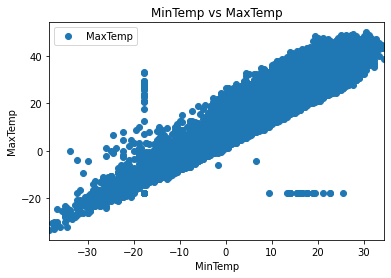

In [13]:
data.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

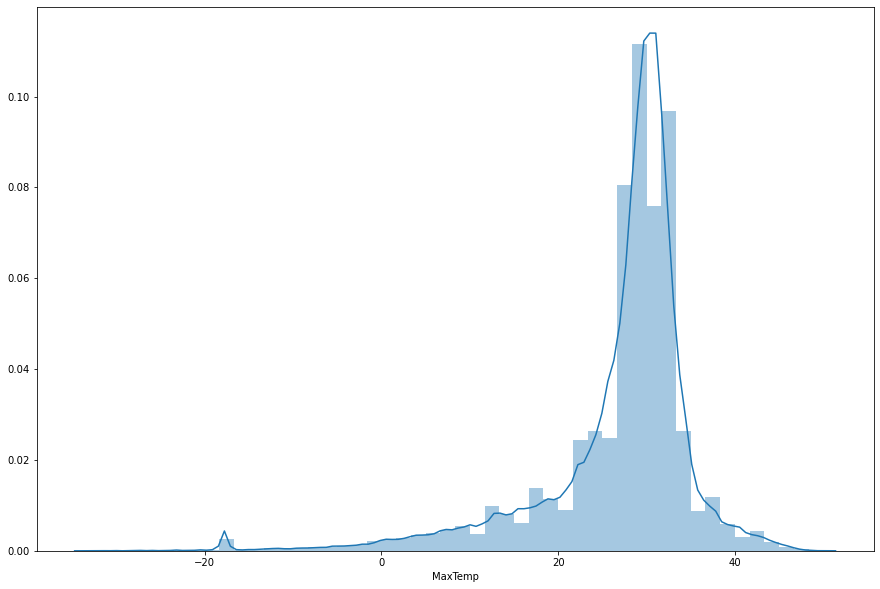

In [14]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(data['MaxTemp'])

In [16]:
X = data['MinTemp'].values.reshape(-1,1)
y = data['MaxTemp'].values.reshape(-1,1)

In [19]:
X

array([[22.22222222],
       [21.66666667],
       [22.22222222],
       ...,
       [18.33333333],
       [18.33333333],
       [17.22222222]])

In [21]:
reg =linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=.2)
print("The No of Rows Columns in X_Train is which is based on test_size given earlier",X_train.shape)
print("The No of Rows Columns in X_test  is which is based on test_size  given earlier",X_test.shape)
print("The No of Rows Columns in y_train is which is based on test_size given earlier",y_train.shape)
print("The No of Rows Columns in y_test  is which is based on test_size  given earlier",y_test.shape)

The No of Rows Columns in X_Train is which is based on test_size given earlier (95232, 1)
The No of Rows Columns in X_test  is which is based on test_size  given earlier (23808, 1)
The No of Rows Columns in y_train is which is based on test_size given earlier (95232, 1)
The No of Rows Columns in y_test  is which is based on test_size  given earlier (23808, 1)


In [22]:
def Testing_Input(feature_columns):
    df_input=sal[feature_columns]
    df_output=sal.salary
    X_train, X_test, y_train, y_test = train_test_split(df_input, df_output, test_size=.6,random_state=123)
    reg =linear_model.LinearRegression()
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [32]:
############Training the Algorithum
reg =linear_model.LinearRegression()
reg.fit(X_train,y_train)
print("reg.intercept_=>%10.10f reg.coef_=%10.8f" %(reg.intercept_,reg.coef_))

reg.intercept_=>10.6618520087 reg.coef_=0.92033997


In [ ]:
###This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

In [143]:
############Now lets do pridicting based on test data
y_pred = reg.predict(X_test)
#Y_test=np.array(y_test)
#df=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})
#df1=pd.DataFrame(y_test,y_pred})
dict1={'Actual':y_test,'Predicted':y_pred}
#df=pd.DataFrame.from_dict(dict1, orient = 'index')
#df1=pd.DataFrame.from_dict(list(dict1.items(),orient = 'index'))
#df = pd.DataFrame(data=dict1, index=None)
test1=list(y_pred)
test2=list(y_test)
df=pd.DataFrame({'Actual':test1,'Predicted':test2})
df["Actual"]= df["Actual"].astype(float) 
df["Predicted"]= df["Predicted"].astype(float) 


In [148]:
#################Calculate the Error Percentages###########
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1993291783785973
Mean Squared Error: 17.631568097568557
Root Mean Squared Error: 4.198996082109217


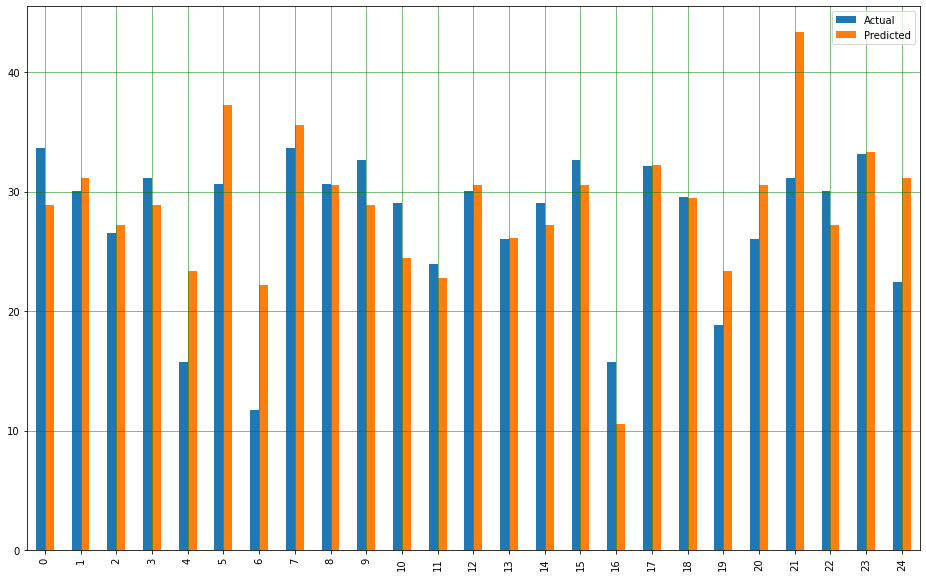

In [146]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

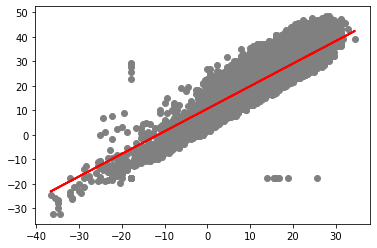

In [147]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()